<a href="https://colab.research.google.com/github/anhhngocc22/R-python/blob/main/222IS2901_DAwR_P_FinalProject_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NHÓM 3
1. Trần Dương Ánh Ngọc _ K204060289
2. Trần Thị Thu Thảo _ K204060295
3. Đặng Quang Huy _	K204061397
4. Phạm Thanh Trà	_ K204061421
5. Trần Thị Ánh Trúc _ K204061422

In [661]:
from google.colab import drive 
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [662]:
#Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from xgboost import plot_importance
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.tree import DecisionTreeClassifier#to build the model
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report


#Data exploration

In [663]:
df = pd.read_csv('/content/drive/Shareddrives/R phyton nhóm 3 /Đồ án CK/credit_risk_dataset.csv', encoding = 'unicode_escape')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [665]:
#check duplicated
df.duplicated().sum()

165

In [666]:
#Drop dlieu trùng lặp
df = df.drop_duplicates()

In [667]:
df.shape

(32416, 12)

In [668]:
# Đếm số giá trị unique ở các cột
cols = ['person_age', 'person_income', 'person_home_ownership','person_emp_length' ,'loan_intent','loan_grade','loan_amnt', 'loan_int_rate','loan_status', 'loan_percent_income','cb_person_cred_hist_length','cb_person_default_on_file' ,'loan_grade']
unique_value_counts = df[cols].nunique().reset_index()
unique_value_counts.columns = ['column_name', 'unique_value_count']
print(unique_value_counts)

                   column_name  unique_value_count
0                   person_age                  58
1                person_income                4295
2        person_home_ownership                   4
3            person_emp_length                  36
4                  loan_intent                   6
5                   loan_grade                   7
6                    loan_amnt                 753
7                loan_int_rate                 348
8                  loan_status                   2
9          loan_percent_income                  77
10  cb_person_cred_hist_length                  29
11   cb_person_default_on_file                   2
12                  loan_grade                   7


In [669]:
# Xem thông số ở các cột dữ liệu bị null
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [670]:
# Hiển thị các dòng có giá trị bị NULL
df[df.isnull().any(axis=1)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [671]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [672]:
# Khảo sát sự phân bố giữa các biến Category
df.describe(include = ['O'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


In [673]:
# Chuyển dữ liệu của cột tuổi thành biến category và chèn thêm  cột person age category vào df
bins = [20, 40, 60, 80, float('inf')]
labels = ['20-40', '40-60', '60-80', '>80']
category_tuoi = pd.cut(df['person_age'], bins=bins, labels=labels)
df.insert(1,'person_age_category',category_tuoi)

In [674]:
# Hiển thị lại df sau khi đã chèn cột Person Age Category
df

,person_age,person_age_category,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,20-40,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,20-40,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,20-40,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,20-40,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,20-40,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,40-60,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,40-60,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,60-80,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,40-60,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [675]:
dataset = df.copy()

In [676]:
#Ở đây ko xét cột biến "loan_status" vì đây là biến phân loại
x = dataset.drop(labels = ["loan_status"], axis = 1)
y = dataset["loan_status"]

#chia dlieu ra làm biến kiểu num và biến kiểu category
dataset_num = dataset.select_dtypes(include='number')
dataset_cat = dataset.select_dtypes(include=['object','category'])

#show dlieu
dataset_num.info()
dataset_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_emp_length           31529 non-null  float64
 3   loan_amnt                   32416 non-null  int64  
 4   loan_int_rate               29321 non-null  float64
 5   loan_status                 32416 non-null  int64  
 6   loan_percent_income         32416 non-null  float64
 7   cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   person_age_category        32401 non-null  ca

#EDA & visualization

###Xét biến loan_status 

In [677]:
#tính tỷ lệ % KH không mắc nợ và mắc nợ 
dataset_percent_loan = dataset_num['loan_status'].value_counts() / len(dataset_num)*100
dataset_percent_loan

0    78.13117
1    21.86883
Name: loan_status, dtype: float64

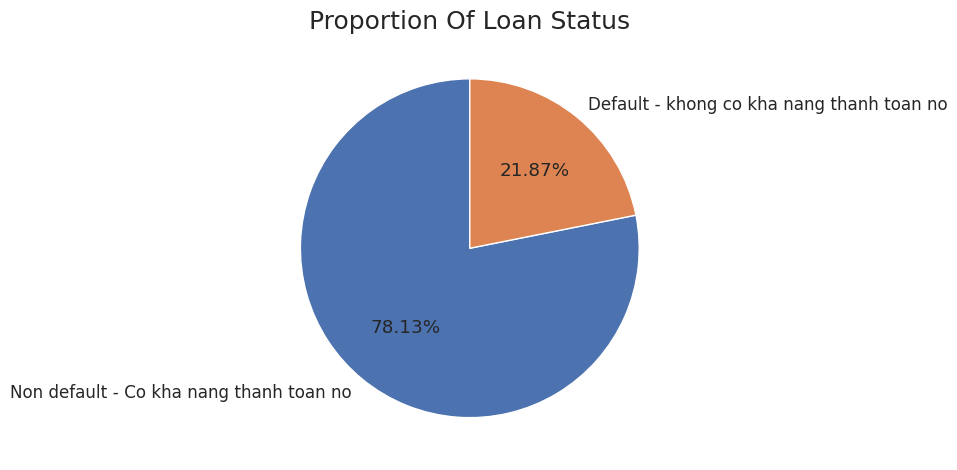

In [678]:
# plt.figure(figsize=(15, 8))

# Tạo biểu đồ tròn thể hiện tỷ lệ giữa KH không mắc nợ và mắc nợ  - khi chưa loại bỏ outlier
labels = ["Non default - Co kha nang thanh toan no", "Default - khong co kha nang thanh toan no"]
plt.pie(dataset_percent_loan, labels=labels, autopct="%1.2f%%", startangle=90)

# Thêm tiêu đề biểu đồ
plt.title("Proportion Of Loan Status")

# Hiển thị biểu đồ
plt.show()

Từ biểu đồ trên ta có thể nhận thấy: 
- Có 78.1% khách hàng có khả năng thanh toán nợ và 21.87% khách hàng không có khả năng thanh toán nợ

#Category data

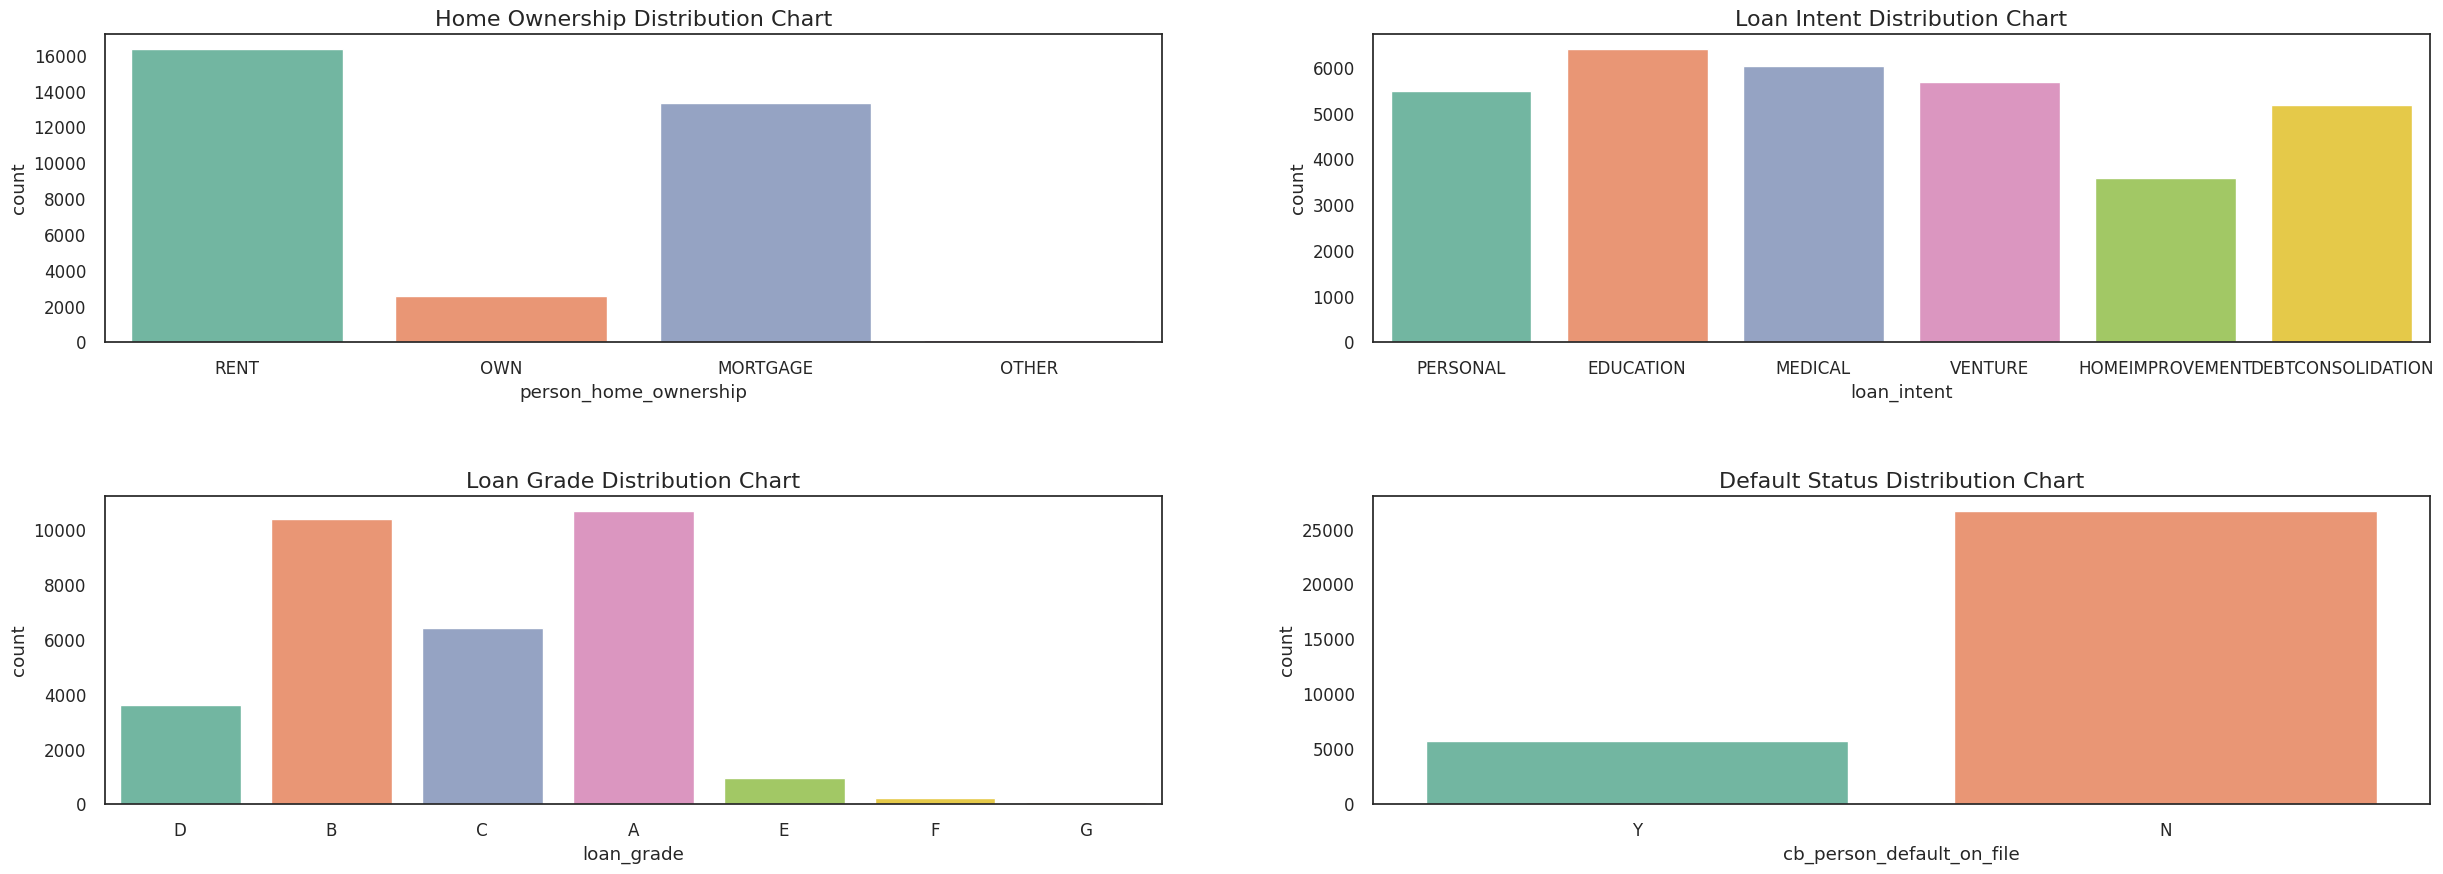

In [679]:
#show giá trị của từng biến category 

fig, ax = plt.subplots(nrows = 2, ncols = 2 , figsize = (30,10), gridspec_kw={"hspace": 0.5,"wspace":0.2})

sns.countplot(x='person_home_ownership', data=dataset_cat, palette=sns.color_palette("Set2"), ax=ax[0,0])
ax[0,0].set_title('Home Ownership Distribution Chart', fontsize=16)
#"Biểu đồ phân bố của các loại sở hữu nhà của khách hàng".

sns.countplot(x='loan_intent', data=dataset_cat, palette=sns.color_palette("Set2"), ax=ax[0,1])
ax[0,1].set_title('Loan Intent Distribution Chart', fontsize=16)
#Biểu đồ phân bố mục đích cho vay

sns.countplot(x='loan_grade', data=dataset_cat, palette=sns.color_palette("Set2"), ax=ax[1,0])
ax[1,0].set_title('Loan Grade Distribution Chart', fontsize=16)
#Biểu đồ phân bố mức độ rủi ro cho vay

sns.countplot(x='cb_person_default_on_file', data=dataset_cat, palette=sns.color_palette("Set2"), ax=ax[1,1])
ax[1,1].set_title('Default Status Distribution Chart', fontsize=16)
#Biểu đồ phân bố tình trạng nợ xấu trong quá khứ

plt.show()

Từ 4 biểu đồ trên, ta có nhận xét như sau:
Ngân hàng cho vay đối người vay  :                 
- Về sở hữu nhà đất của khách vay: Khách vay là những người thuê nhà và thế chấp là cao
- Về mục đích vay vốn thì khách vay đa số tập trung ở: personal, giáo dục, y tế, kinh doanh, cải tạo nhà cửa, 
- Về phân lớp khách hàng cho vay: Khách hàng  vay tập trung ở lớp A và B nhiều nhất
- Về lịch sử mắc nợ: Khách vay với lịch sử chưa vay trước đó chiếm nhiều

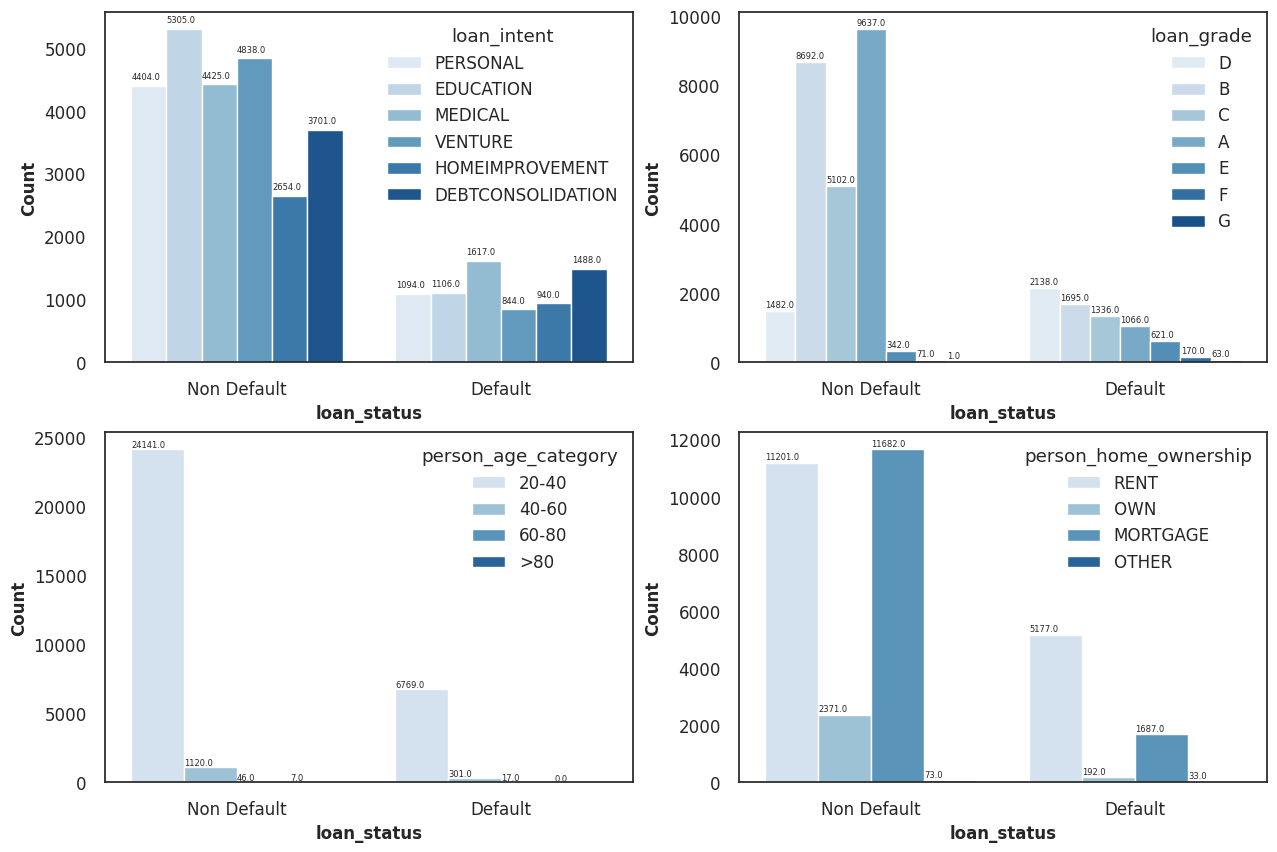

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [680]:
# Dùng biểu đồ trực quan hóa giữa các biến category với biến "loan_status"
def plot_category_data(data, x, legend, axs):
  sns.set(style='white', font_scale=1.1)
  fig = plt.figure(figsize=[6,6])
  ax = sns.countplot(data=data, x=x, hue=legend, palette='Blues', ax=axs)
  ax.set_xticklabels(['Non Default','Default'])
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.001, p.get_height()+100), fontsize=6)
  ax.set_xlabel(x,   weight='bold',fontsize='12')
  ax.set_ylabel('Count', weight='bold', fontsize='12')
  sns.despine()


fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize =(15,10))
plot_category_data(df, 'loan_status', 'loan_intent', axs[0,0]);
plot_category_data(df, 'loan_status', 'loan_grade', axs[0,1]);
plot_category_data(df, 'loan_status', 'person_age_category', axs[1,0]);
plot_category_data(df, 'loan_status', 'person_home_ownership', axs[1,1]);

**Nhận xét**
- Biểu đồ trên so sánh các biến phân loại với loan_status
- Về mục đích vay: Người có khả năng thanh toán nợ vay tiền chủ yếu vào mục đích đầu tư và giáo dục là nhiều; còn người không có khả năng thanh toán thì vay chủ yếu với mục đích là y tế và vay tiền bên ngân hàng để trả nợ các khoản nợ khác.
- Về phân lớp khách hàng vay thì: Người có khả năng thanh toán nợ thì vay ở cấp A và B nhiều nhất; còn người không có khả năng thanh toán nợ thì số lượng cấp D và B là nhiều nhất.
- Về tuổi tác : Người có khả năng thanh toán nợ tập trung nhiều nhất ở độ tuổi 20-40; còn người không có khả năng thanh toán nợ thì độ tuổi của họ tập trung nhiều ở 20-40
- Về số lượng sở hữu nhà cửa: Người có khá năng thanh toán nợ thì họ là những người thuê nhà và thuế chấp ; còn những người không có khả năng thanh toán nợ thì họ cũng là những người thuê nhà và thế chấp. 


#Numerical Data

In [681]:
#Dùng biểu đồ scatter plot để tổng quan phát hiện outlier với dataset_num
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

fig = px.scatter_matrix(dataset_num, dimensions=
            ["person_age", "person_income", "person_emp_length",
             "loan_amnt","loan_int_rate"],height=900, color='loan_status',
            color_continuous_scale=px.colors.diverging.Geyser)
fig.show()


**Nhận xét**
Ma trận biểu đồ trên giúp ta dễ dàng nhìn thấy các giá trị ngoại lai của từng biến và lựa chọn được mức dữ liệu cần giữ lại giúp cho mô hình đạt hiệu quả cao hơn 
- "person_age": Tuổi khách hàng lấy dữ liệu <100 tuổi
- "person_income": Thu nhập hằng năm lấy dữ liệu <$3M
- "person_emp_length": Thời gian làm việc lấy <50 năm
- "loan_amt": Số tiền vay và "loan_int_rate": Lãi suất vay có dữ liệu cân bằng 

###khai phá biến loan_status

Vẽ biểu đồ so sánh giữa biến "person_age" và "loan_status"

---



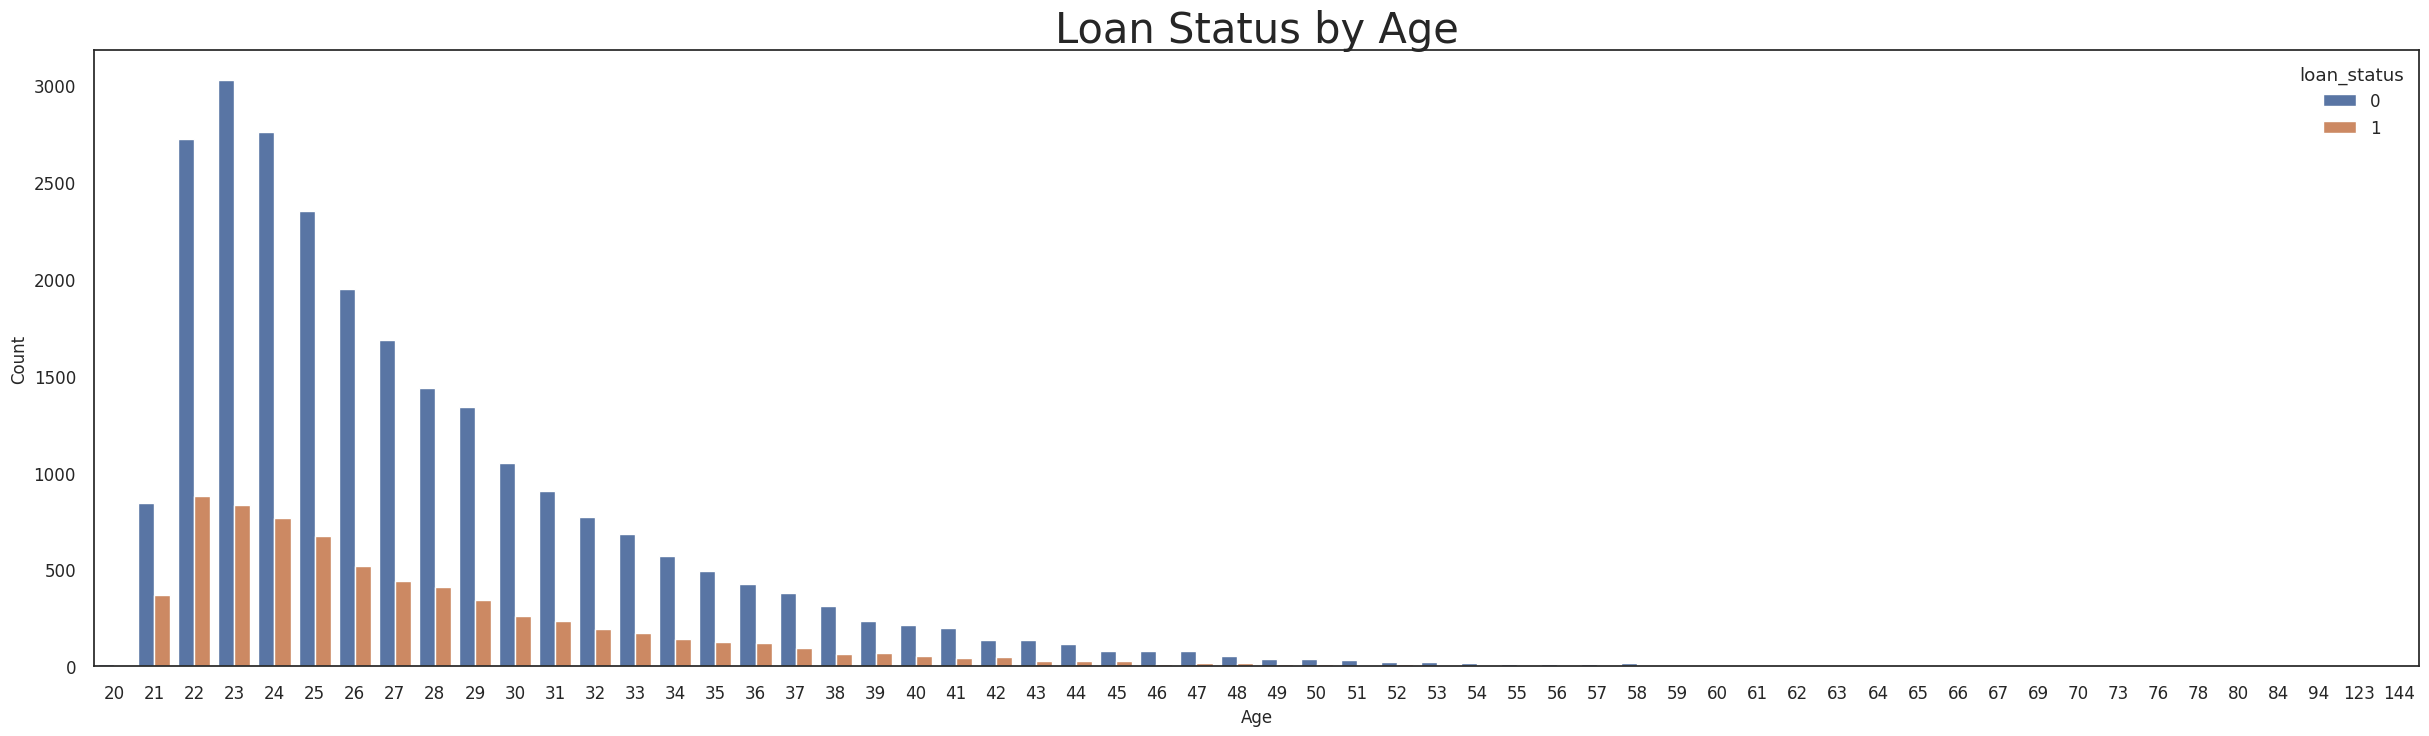

In [682]:
plt.figure(figsize=(30, 8))

# vẽ biểu đồ so sánh giữa biến "person_age" và "loan_status"
sns.countplot(x = 'person_age', hue= 'loan_status', data=dataset_num);
plt.title('Loan Status by Age', fontsize = 30)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
# hiển thị biểu đồ
plt.show()

**Nhận xét** Từ biểu đồ trên ta có thể nhận thấy: 
- Trong đó số lượng khách hàng không có khả năng trả nợ thì tỷ lệ mắc nợ cao nằm ở giới trẻ với độ tuổi từ 21-29 tuổi. Đặc biệt ở độ tuổi 22-23 tuổi có số lượng người không có khả năng trả nợ cao nhất trên tổng số người không có khả năng trả nợ

Vẽ biểu đồ so sánh biến "person_emp_length" và biến "loan_status"

---



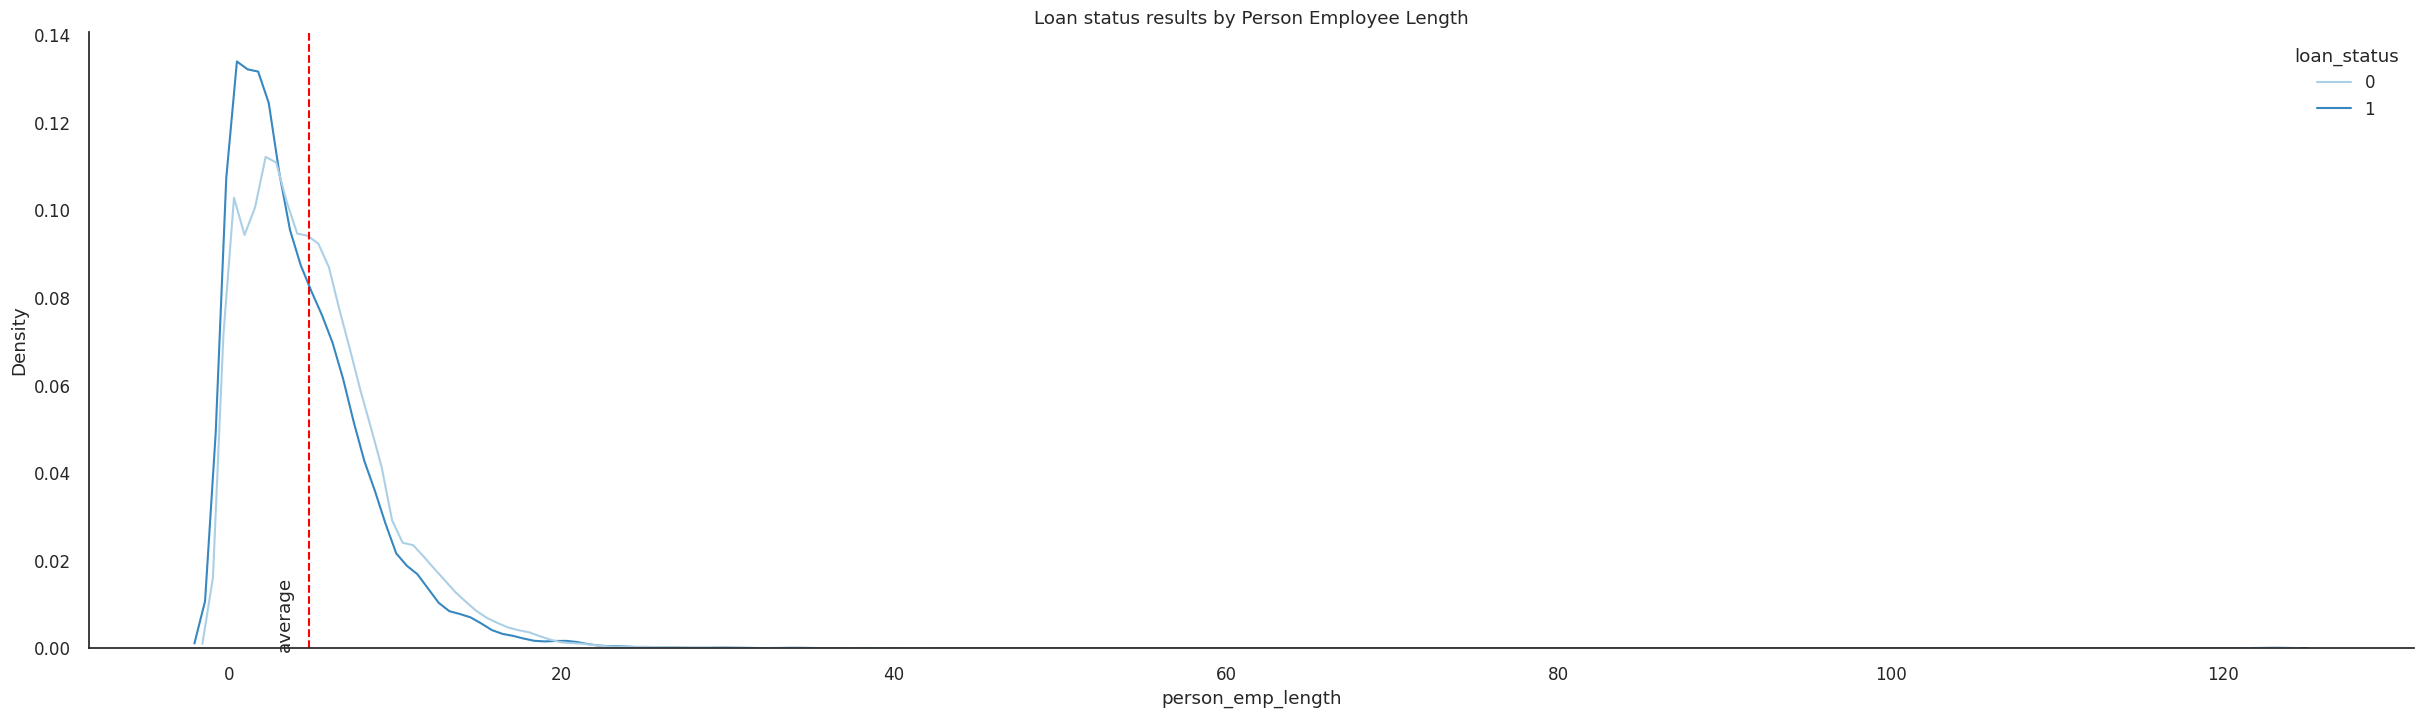

In [683]:
plt.figure(figsize=(30, 8))
sns.set(style='white', font_scale=1.1)
# plt.figure(figsize = (8,5))
sns.kdeplot(data = df, x= "person_emp_length", hue = "loan_status", common_norm = False, palette ="Blues")
plt.title("Loan status results by Person Employee Length")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.axvline(df["person_emp_length"].mean(),ls = "--", color = "red")
plt.text(df["person_emp_length"].mean()-2,0,'average',rotation=90)
plt.savefig('Loan status results by Person Employee Length.jpg',transparent=True, bbox_inches='tight')
plt.show()

**Nhận xét**
+ Kết quả phân tích dựa trên biểu đồ cho thấy sự phân bố của số năm kinh nghiệm làm việc và trạng thái về khả năng thanh toán khoản vay. 
+ Dựa trên biểu đồ, có thể thấy rằng tỷ lệ của những người không có khả năng thanh toán khoản vay là cao nhất khi số năm kinh nghiệm làm việc còn ít, với giá trị gần 0.14. Điều này cho thấy ngân hàng cần thiết phải thực hiện các biện pháp thắt chặt quy định vay để đảm bảo tính bền vững và đúng đắn trong hoạt động cho vay. 


Vẽ biểu đồ so sánh biến "person_home_ownership" và biến "person_age"

---



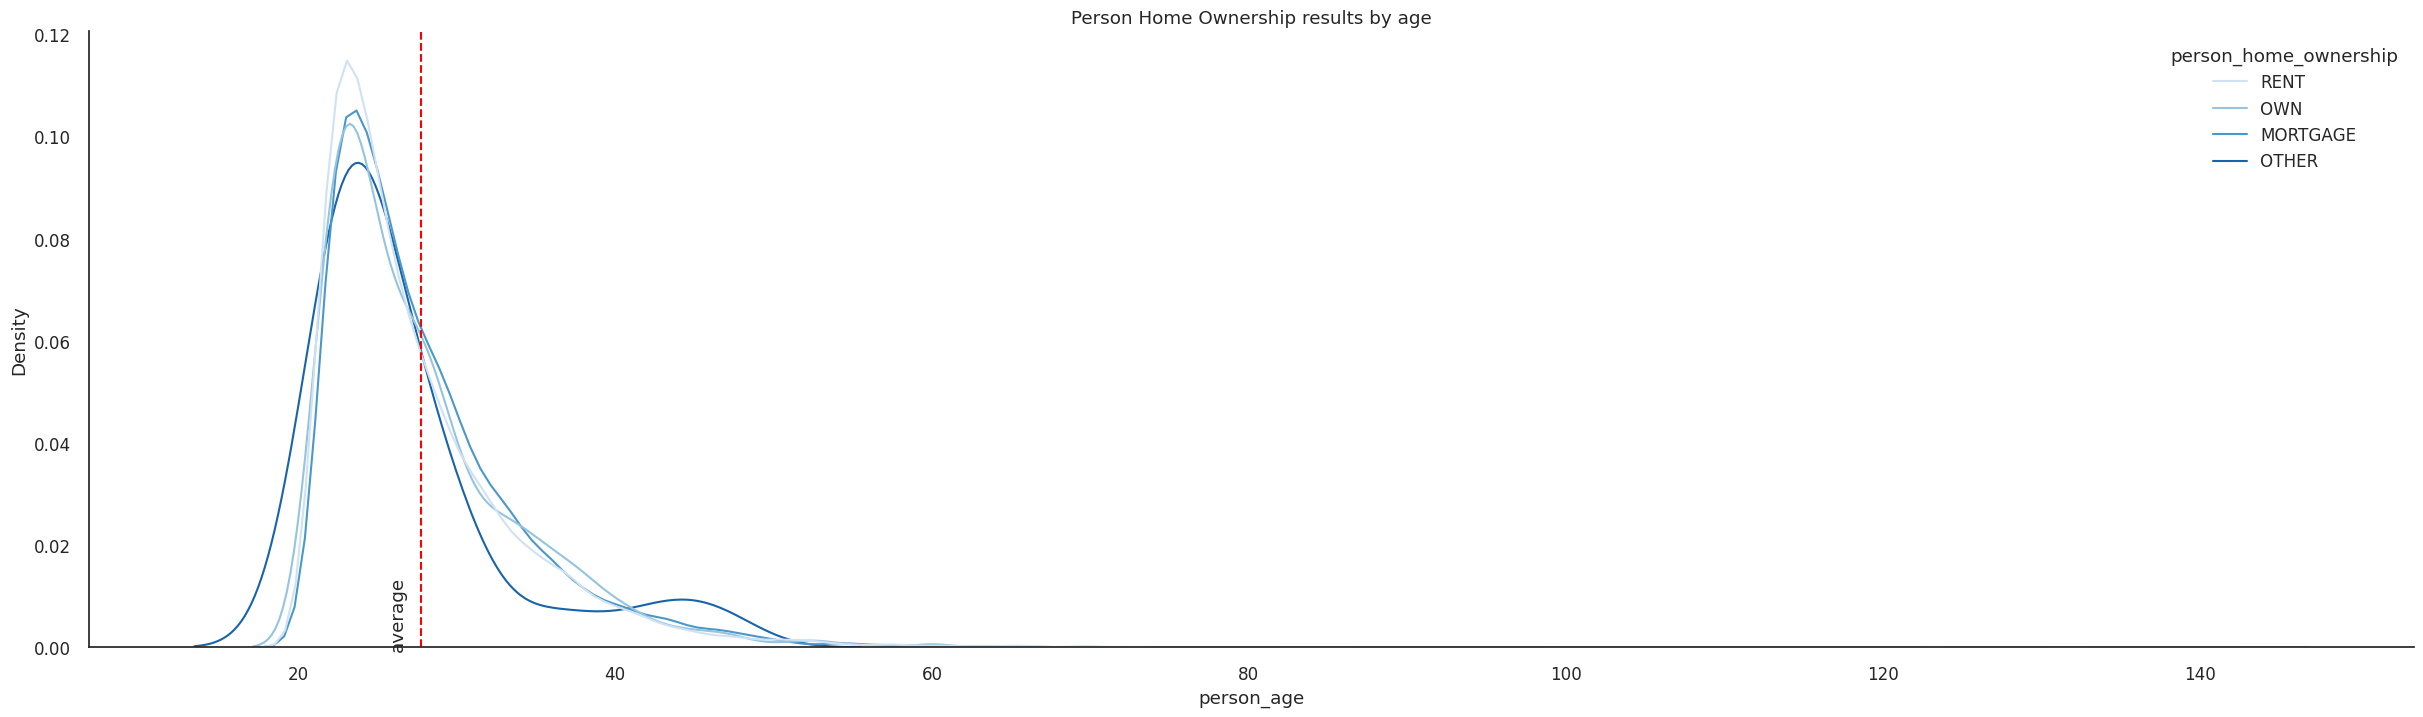

In [684]:
plt.figure(figsize=(30, 8))
sns.set(style='white', font_scale=1.1)
# plt.figure(figsize = (8,5))
sns.kdeplot(data = df, x= "person_age", hue = "person_home_ownership", common_norm = False, palette ="Blues")
plt.title("Person Home Ownership results by age")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.axvline(df["person_age"].mean(),ls = "--", color = "red")
plt.text(df["person_age"].mean()-2,0,'average',rotation=90)
plt.savefig('Person Home Ownership results by age.jpg',transparent=True, bbox_inches='tight')
plt.show()

**Nhận xét**
+ Biểu đồ cho thấy sự phân bố của trạng thái sở hữu nhà 
+ Trong khoảng độ tuổi từ 20 đến 30 tuổi. Có nhiều khách hàng trong độ tuổi này, chiếm đa số, trong khi sự phân bố giảm dần từ 30 tuổi trở đi. Đây có thể là thông tin quan trọng để nắm bắt sở thích, nhu cầu và hành vi tiêu dùng của khách hàng trong độ tuổi này.


Trực quan hóa dữ liệu 3 biến "loan_grade", "loan_percent_income" và "loan_status"

---



In [685]:
fig = px.box(dataset, x="loan_grade", y="loan_percent_income",
             color="loan_status", 
             color_discrete_sequence=px.colors.qualitative.Set1,
             category_orders={'loan_grade':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']})

fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
                y=1.02, xanchor="right", x=1))
fig.show() 

Biểu đồ boxplot giúp ta có cái nhìn tổng quan giữa "Tình trạng vay nợ", "Hạng mức vay", "Tỷ lệ vay/ thu nhập" của khách hàng 
- Những người mắc nợ (loan_status được biểu diễn màu đỏ) có tỷ lệ vay/thu nhập 
- Hạng mức G có số lượng khách hàng mắc nợ cao nhất (ko có khách hàng ko nợ ở lớp G). Tỷ lệ trung bình của mức vay/thu nhập cá nhân = 0.26 cao hơn cả lớp C, D, E, F. 

=> Điều này cho ta thấy, người có thu nhập ít lại vay nhiều hơn nhiều so với người có thu nhập cao-ổn định. Và người có khả năng vỡ nợ lớn lại thuộc lớp G này do đó, chúng ta cần xem xét kỹ hồ sơ khi cho vay cũng như hạn chế số lượng khách ở hạng G được xét duyệt

#Handle missing value

In [686]:
#fill dlieu bị null ở hai cột "Person Emp Length và Loan Int Rate" theo gtri trung bình
dataset["person_emp_length"].fillna(dataset["person_emp_length"].median(), inplace=True)
dataset["loan_int_rate"].fillna(dataset["loan_int_rate"].median(), inplace=True)

In [687]:
dataset.head(5)

,person_age,person_age_category,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,20-40,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,20-40,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,20-40,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,20-40,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,20-40,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [688]:
dataset = dataset.drop('person_age_category', axis=1)

In [689]:
# Xem thông số ở các cột dữ liệu bị null
dataset.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#Remove Outliers

In [690]:
def boxplot_numeric_vars(df, columns=None, color='blue', title=None, title_fontsize=12):
    if columns is None:
        numeric_vars = df.select_dtypes(include='number').columns.tolist()
    else:
        numeric_vars = columns
    # chọn các biến numeric trong DataFrame hoặc chỉ định danh sách các cột

    data = df.loc[:, numeric_vars]
    # lấy dữ liệu cho các cột tương ứng

    fig, ax = plt.subplots(nrows=1, ncols=len(numeric_vars), figsize=(20, 6))
    # tạo subplot cho từng biến numeric

    for i, var in enumerate(numeric_vars):
        ax[i].boxplot(data[var], patch_artist=True, boxprops=dict(facecolor=color))
        ax[i].set_title(var if title is None else title[i], fontsize=title_fontsize)
        ax[i].set_xticklabels([var], fontsize=title_fontsize-2)
        # vẽ boxplot cho từng biến numeric và đặt tiêu đề và chú thích tên cột cho subplot
        ax[i].yaxis.grid(True)

    plt.show()

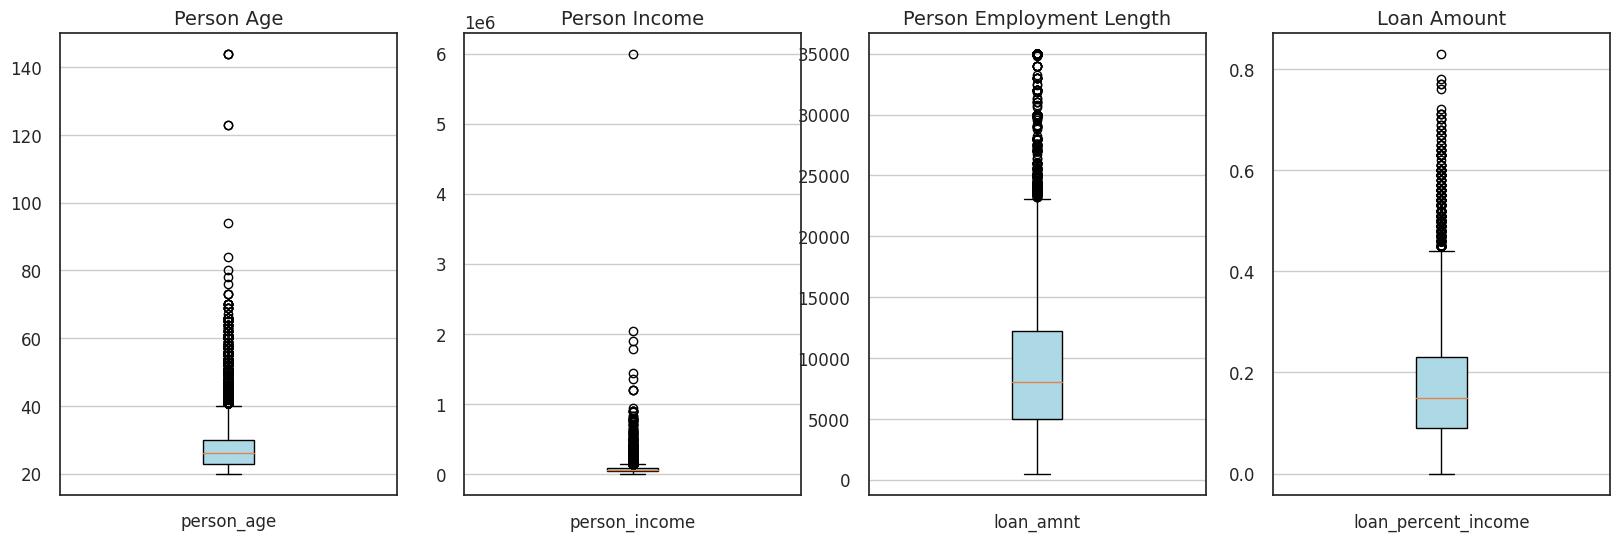

In [691]:
# Trực quan hóa các biến Numeric bằng boxplot
boxplot_numeric_vars(df, columns=['person_age', 'person_income', 'loan_amnt', 'loan_percent_income'], 
                     color='lightblue', title=['Person Age', 'Person Income', 'Person Employment Length', 'Loan Amount', 'Loan Interest Rate', 'Loan Percentage of Income'], title_fontsize=14)

Thể hiện các outlier của các biến sau:
- person_age: có outlier từ 40-144 tuổi
- person_income: có outlier xấp xỉ từ 760K đến 6M USD
- loan-amount: có outlier từ 23000 đến 35000 USD
- loan_percent_income: có outlier xấp xỉ từ 0.42 đến 0.83


In [692]:
#Remove the outliers - truyền hàm
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [693]:
# Loại bỏ giá trị ngoại lai bằng cách gọi hàm remove_outlier trên cột "person_age" của DataFrame 'df'
lowerprice, upperprice = remove_outlier(df["person_age"])

# Thay thế các giá trị ngoài giới hạn bằng giới hạn dưới và giới hạn trên
df.loc[df["person_age"] > upperprice, "person_age"] = upperprice
df.loc[df["person_age"] < lowerprice, "person_age"] = lowerprice

In [694]:
# Loại bỏ giá trị ngoại lai bằng cách gọi hàm remove_outlier trên cột "person_income" của DataFrame 'df'
lowerprice, upperprice = remove_outlier(df["person_income"])

# Thay thế các giá trị ngoài giới hạn bằng giới hạn dưới và giới hạn trên
df.loc[df["person_income"] > upperprice, "person_income"] = upperprice
df.loc[df["person_income"] < lowerprice, "person_income"] = lowerprice

In [695]:
# Loại bỏ giá trị ngoại lai bằng cách gọi hàm remove_outlier trên cột "loan_amnt" của DataFrame 'df'
lowerprice, upperprice = remove_outlier(df["loan_amnt"])

# Thay thế các giá trị ngoài giới hạn bằng giới hạn dưới và giới hạn trên
df.loc[df["loan_amnt"] > upperprice, "loan_amnt"] = upperprice
df.loc[df["loan_amnt"] < lowerprice, "loan_amnt"] = lowerprice

In [696]:
# Loại bỏ giá trị ngoại lai bằng cách gọi hàm remove_outlier trên cột "loan_percent_income" của DataFrame 'df'
lowerprice, upperprice = remove_outlier(df["loan_percent_income"])

# Thay thế các giá trị ngoài giới hạn bằng giới hạn dưới và giới hạn trên
df.loc[df["loan_percent_income"] > upperprice, "loan_percent_income"] = upperprice
df.loc[df["loan_percent_income"] < lowerprice, "loan_percent_income"] = lowerprice

Biểu đồ đã được loại bỏ outlier

[Text(0.5, 1.0, 'Boxplot of loan_percent_income')]

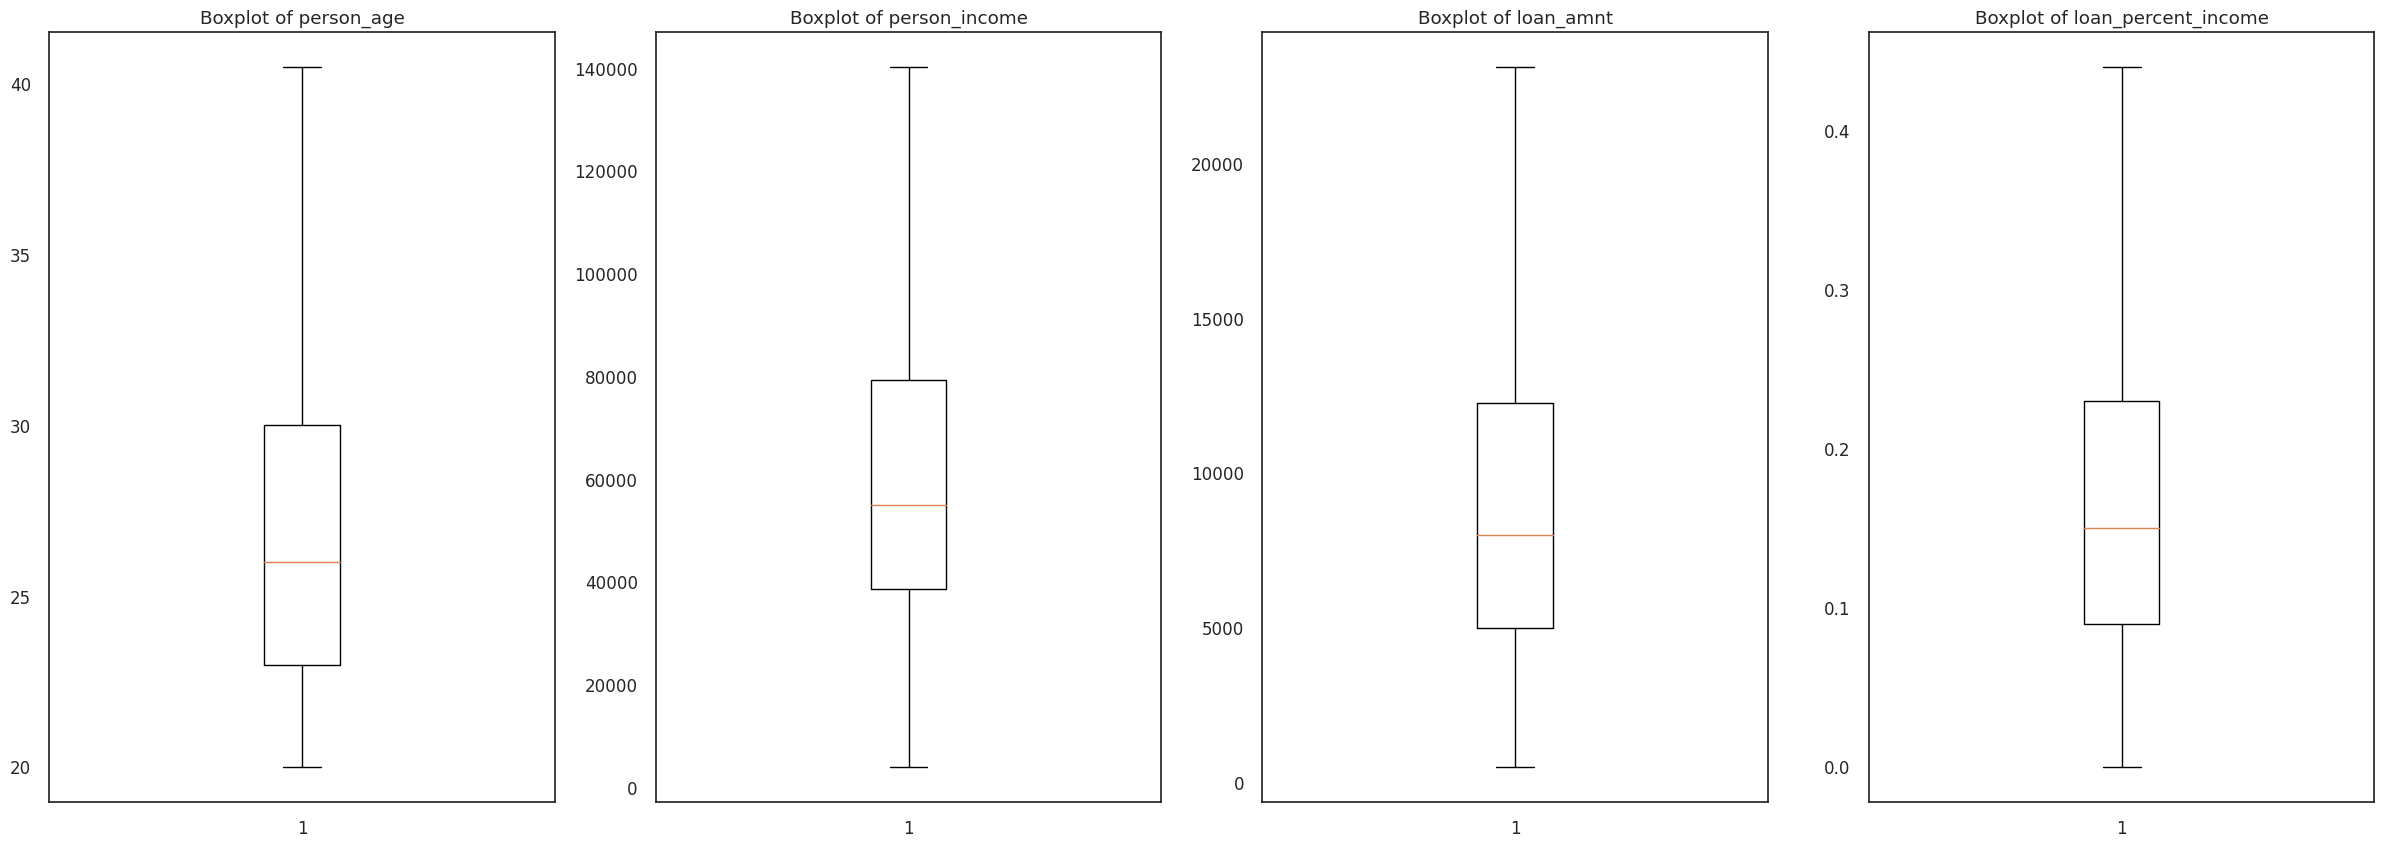

In [697]:
#vẽ biểu đồ boxplot SAU KHI REMOVE OUTLIERS
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, nrows = 1, figsize = (30,10))

ax1.boxplot(df['person_age'])
ax1.set(title = 'Boxplot of person_age')

ax2.boxplot(df['person_income'])
ax2.set(title = 'Boxplot of person_income')

ax3.boxplot(df['loan_amnt'])
ax3.set(title = 'Boxplot of loan_amnt')

ax4.boxplot(df['loan_percent_income'])
ax4.set(title = 'Boxplot of loan_percent_income')



#Xử lý các biến Category - dán nhãn dlieu

In [698]:
# Xem danh sách các biến category
le = LabelEncoder()

is_category = dataset.dtypes == object

category_column_list = dataset.columns[is_category].tolist()
category_column_list

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [699]:
dataset[category_column_list] = dataset[category_column_list].apply(lambda col: le.fit_transform(col))
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [700]:
# Chuẩn hóa các biến liên tục 
# Chỉ định các cột cần chuẩn hóa
cols_to_normalization = ['person_age', 'person_income','person_emp_length','loan_int_rate','loan_percent_income']

#Feature Selection 

<ipython-input-701-3f369859c27c>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



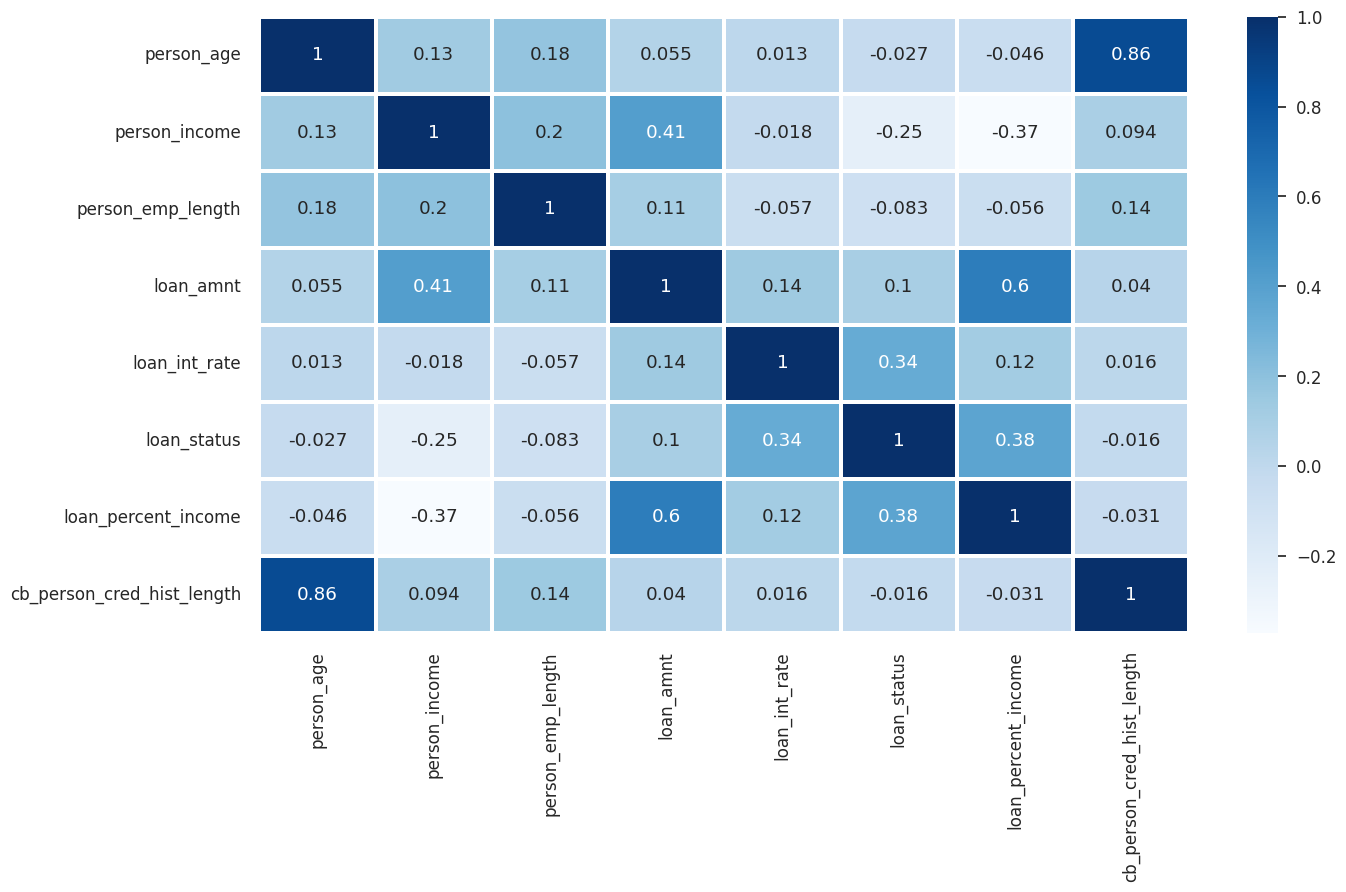

In [701]:
#tạo heatmap để xem sự tương quan giữa các biến
diabetes = df
plt.figure(figsize=(15, 8))
sns.heatmap(diabetes.corr(), annot = True, cmap = 'Blues', linewidths=1.5)
plt.show()

**Nhận xét**
- Ma trận tương quan dưới đây chỉ xem xét các biến định lượng và tính toán mối tương quan cho từng biến này. Các giá trị gần bằng 1 biểu thị mối tương quan dương mạnh mẽ và giá trị gần bằng -1 biểu thị mối tương quan âm mạnh mẽ.

Nhìn vào sơ đồ hệ số tương quan giữa hai yếu tố trong tập dữ liệu, chúng ta có thể thấy: 

> Có 1 giá trị tương quan thể hiện mối tương quan yếu với biến Person_income như Loan_present_income -> Không đủ mạnh để phân tích dữ liệu


> Có 1 giá trị thể hiện mối tương quan mạnh với biến Person_age như cb_preson_cred_hist_length -> Mối tương quan mạnh khi phân tích có thể làm sai lệch dữ liệu nên ta chỉ chọn 1 trong 2 biến





In [702]:
#loại bỏ biến cb_person_cred_hist_length do có độ tương quan mạnh
dataset = dataset.drop('cb_person_cred_hist_length', axis=1)

In [703]:
dataset.isnull().sum()

person_age                   0
person_income                0
person_home_ownership        0
person_emp_length            0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_int_rate                0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [704]:
X = dataset.drop(['loan_status'], axis=1) # X là dữ liệu đầu vào
y = dataset['loan_status'] # y là biến mục tiêu dự đoán

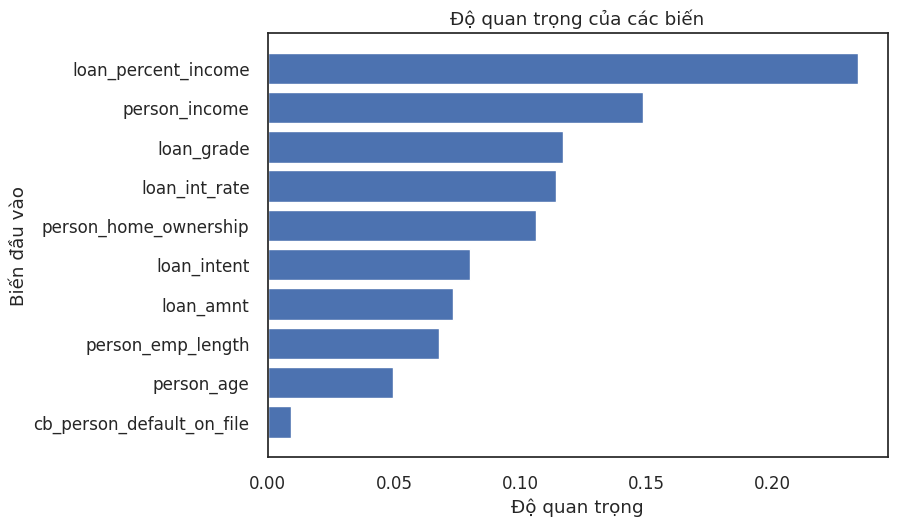

In [705]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier()

# Đưa dữ liệu vào mô hình để huấn luyện
model.fit(X, y) # X là dữ liệu đầu vào, y là biến mục tiêu dự đoán

# Tính độ quan trọng của các biến
importances = model.feature_importances_

# Sắp xếp độ quan trọng theo thứ tự giảm dần
sorted_idx = importances.argsort()[::+1]

# Vẽ đồ thị độ quan trọng của các biến dưới dạng kiểu ngang
plt.barh(range(X.shape[1]), importances[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Độ quan trọng')
plt.ylabel('Biến đầu vào')
plt.title('Độ quan trọng của các biến')
plt.show()


In [706]:
#loại bỏ thêm biến cb_person_default_on_file do mức độ quan trọng của biến với tệp dlieu quá thấp và cũng ko ảnh hưởng tương quan heatmap mạnh
dataset = dataset.drop('cb_person_default_on_file', axis=1)

#Min-Max Scaling

In [707]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa các cột
dataset[cols_to_normalization] = scaler.fit_transform(dataset[cols_to_normalization])

In [708]:
dataset.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,0.062476,0.010356,1.677135,0.038771,2.533533,1.220508,9593.845632,0.314307,0.218688,0.205120
std,0.051243,0.010343,1.433183,0.033255,1.730862,1.167293,6322.730241,0.173205,0.413363,0.128689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000
25%,0.024194,0.005761,0.000000,0.016260,1.000000,0.000000,5000.000000,0.172472,0.000000,0.108434
50%,0.048387,0.008506,3.000000,0.032520,3.000000,1.000000,8000.000000,0.312921,0.000000,0.180723
75%,0.080645,0.012545,3.000000,0.056911,4.000000,2.000000,12250.000000,0.432022,0.000000,0.277108
max,1.000000,1.000000,3.000000,1.000000,5.000000,6.000000,35000.000000,1.000000,1.000000,1.000000


#SMOTE

In [709]:
#biến "loan_status" là biến mục tiêu do đó cần loại bỏ nó trc khi chạy mô hình

x = dataset.drop(['loan_status'], axis=1) 
y = dataset['loan_status']  

In [710]:
dataset.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,0.016129,0.009173,3,1.000000,4,3,35000,0.595506,1,0.710843
1,0.008065,0.000934,2,0.040650,1,1,1000,0.321348,0,0.120482
2,0.040323,0.000934,0,0.008130,3,2,5500,0.418539,1,0.686747
3,0.024194,0.010257,3,0.032520,3,2,35000,0.551124,1,0.638554
4,0.032258,0.008406,3,0.065041,3,2,35000,0.497191,1,0.662651


In [711]:
#chia tệp train-test
x_credit_train, x_credit_test, y_credit_train, y_credit_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [712]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_credit_train_smote, y_credit_train_smote = sm.fit_resample(x_credit_train, y_credit_train)


In [713]:
y_credit_train_smote.value_counts()

0    20254
1    20254
Name: loan_status, dtype: int64

#Run Model

##Logistic Regression

In [714]:
# Tạo mô hình Logistic Regression
logistic_credit = LogisticRegression(random_state=42)
# Fit mô hình với dữ liệu huấn luyện
logistic_credit.fit(x_credit_train, y_credit_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [715]:
#confusion matrix
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["Positive","Negative"])
    disp.plot(cmap='Blues',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(axis='both',which='both',visible=False)
    plt.show()

In [716]:
# Tính accuracy logistic trên test
accuracy_logistic = logistic_credit.score(x_credit_test, y_credit_test)
print("Accuracy score of Logistic Regression:", accuracy_logistic*100)

Accuracy score of Logistic Regression: 81.47748303516347


In [717]:
# Xem chỉ số predict trên tập train và tập test
y_predict_train_lgr = logistic_credit.predict(x_credit_train)
y_predict_test_lgr = logistic_credit.predict(x_credit_test)

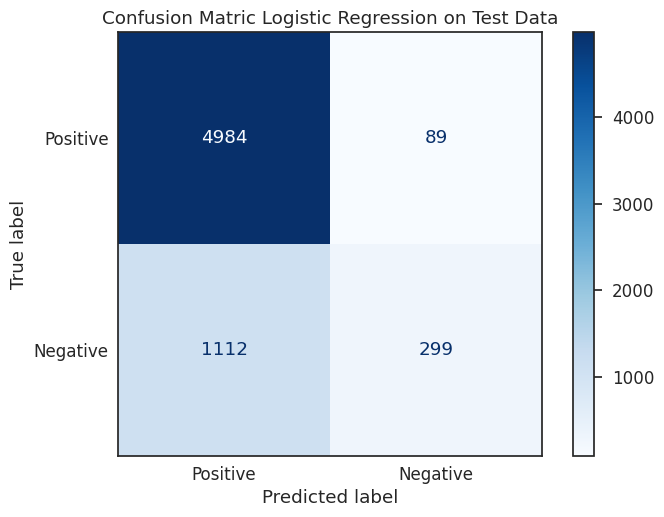

In [718]:
make_confusion_matrix(y_credit_test,y_predict_test_lgr,"Confusion Matric Logistic Regression on Test Data")

Hàm nhầm lẫn trên tập test của hàm Logictis 
- Giao dịch được phê duyệt: Dự đoán đúng có 4984 giao dịch được phê duyệt (có khả năng thanh toán - không bị vỡ nợ); Dự đoán sai 89 được phê duyệt  tức là  giao dịch được phê duyệt nhưng lại dự đoán sai thành giao dịch không được phê duyệt
- Giao dịch không được phê duyệt: Dự đoán đúng có 1112 giao dịch không  được phê duyệt; Dự đoán sai 299 giao dịch không được phê duyệt  tức là  giao dịch không được  phê duyệt nhưng lại dự đoán sai thành giao dịch được phê duyệt


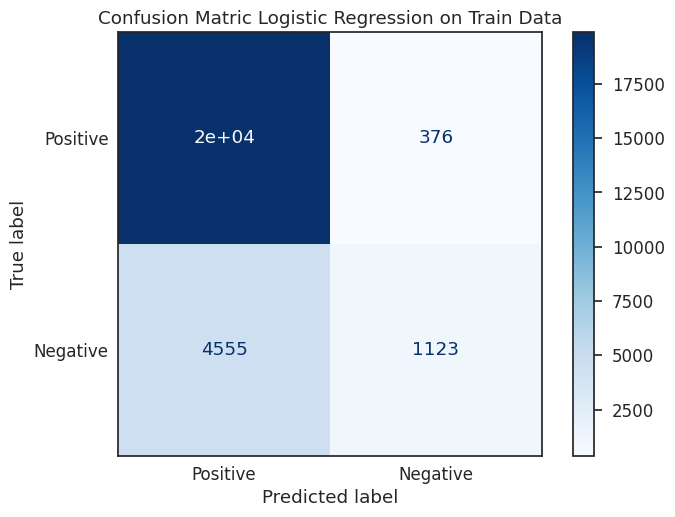

In [719]:
make_confusion_matrix(y_credit_train,y_predict_train_lgr,"Confusion Matric Logistic Regression on Train Data")

Hàm nhầm lẫn trên tập train của hàm Logictis 
- Giao dịch được phê duyệt: Dự đoán đúng có 2e+4 giao dịch được phê duyệt (có khả năng thanh toán - không bị vỡ nợ); Dự đoán sai 376 được phê duyệt  tức là  giao dịch được phê duyệt nhưng lại dự đoán sai thành giao dịch không được phê duyệt.
- Giao dịch không được phê duyệt: Dự đoán đúng có 4555 giao dịch không  được phê duyệt; Dự đoán sai 1123  không được phê duyệt  tức là  giao dịch không được  phê duyệt nhưng lại dự đoán sai thành giao dịch được phê duyệt


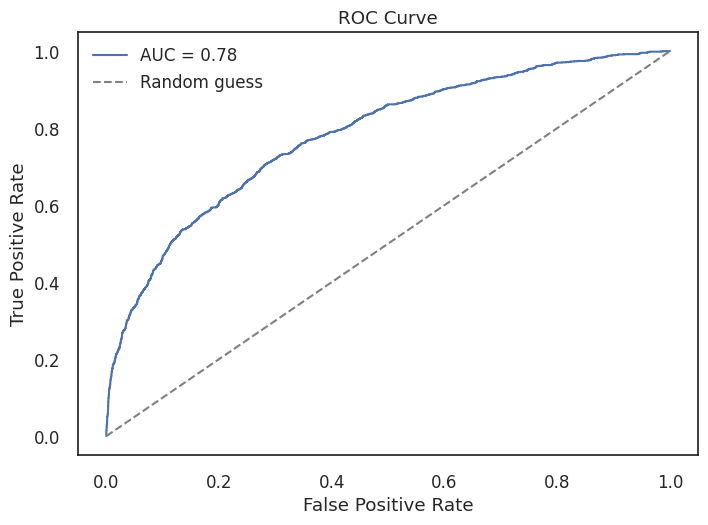

In [720]:
# Tính score dự đoán của mô hình trên tập kiểm tra
y_predict_test_lgr = logistic_credit.predict_proba(x_credit_test)[:,1]

# Tính FPR, TPR và ngưỡng (threshold) tương ứng
fpr, tpr, threshold = roc_curve(y_credit_test, y_predict_test_lgr)

# Tính AUC-ROC
roc_auc = roc_auc_score(y_credit_test, y_predict_test_lgr)

# Vẽ đường cong AUC-ROC
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [721]:
report_lgr = classification_report(y_credit_test, y_predict_test_lgr.round())
print("Classification Report:\n", report_lgr)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      5073
           1       0.77      0.21      0.33      1411

    accuracy                           0.81      6484
   macro avg       0.79      0.60      0.61      6484
weighted avg       0.81      0.81      0.77      6484



##Random Forest

In [722]:
# Tạo mô hình Random Forest với n_estimators = 100 và criterion='gini'
random_forest_credit = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42)
# Fit mô hình với dữ liệu huấn luyện
random_forest_credit.fit(x_credit_train, y_credit_train)

RandomForestClassifier(random_state=42)

In [723]:
# Dự đoán kết quả với dữ liệu kiểm tra
predictions_random = random_forest_credit.predict(x_credit_test)
predictions_random

array([0, 1, 0, ..., 0, 0, 0])

In [724]:
# Tính độ chính xác của mô hình
accuracy_rdf = accuracy_score(y_credit_test, predictions_random)
print("Accuracy score of Random Forest:", accuracy_rdf*100)

Accuracy score of Random Forest: 93.3066008636644


In [725]:
# Xem chỉ số predict trên tập train và tập test
y_predict_train_rdf = random_forest_credit.predict(x_credit_train)
y_predict_test_rdf = random_forest_credit.predict(x_credit_test)

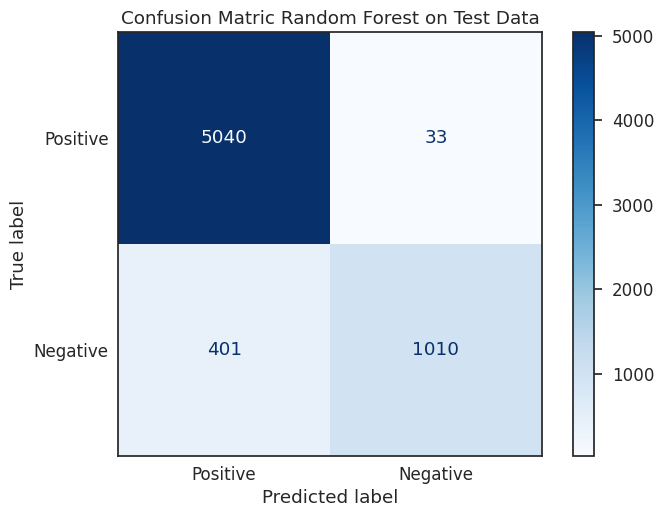

In [726]:
make_confusion_matrix(y_credit_test,y_predict_test_rdf,"Confusion Matric Random Forest on Test Data")

Hàm nhầm lẫn trên tập test của hàm Random Forest
- Giao dịch được phê duyệt: Dự đoán đúng có 5040 giao dịch được phê duyệt (có khả năng thanh toán - không bị vỡ nợ); Dự đoán sai 33 được phê duyệt  tức là  giao dịch được phê duyệt nhưng lại dự đoán sai thành không được phê duyệt.
- Giao dịch không được phê duyệt: Dự đoán đúng có 401 giao dịch không  được phê duyệt; Dự đoán sai 1010 không được phê duyệt  tức là  giao dịch được không được phê duyệt nhưng lại dự đoán sai thành giao dịch được phê duyệt 


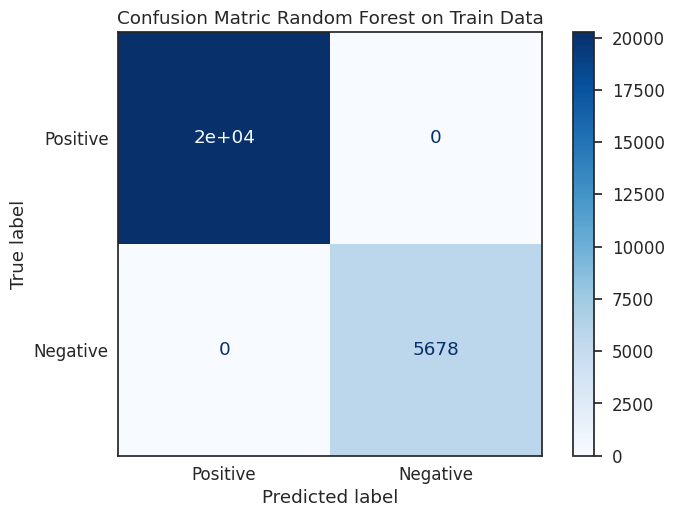

In [727]:
make_confusion_matrix(y_credit_train,y_predict_train_rdf,"Confusion Matric Random Forest on Train Data")

Hàm nhầm lẫn trên tập train của hàm Random Forest
- Giao dịch được phê duyệt: Dự đoán đúng có 2e+04 giao dịch được phê duyệt (có khả năng thanh toán - không bị vỡ nợ); Dự đoán sai 0 được phê duyệt  tức là  giao dịch được phê duyệt nhưng lại dự đoán sai không được phê duyệt.
- Giao dịch không được phê duyệt: Dự đoán đúng có 0 giao dịch không được phê duyệt; Dự đoán sai 5678 giao dịch không được phê duyệt tức là giao dịch không được phê duyệt nhưng lại dự đoán sai thành giao dịch được phê duyệt.


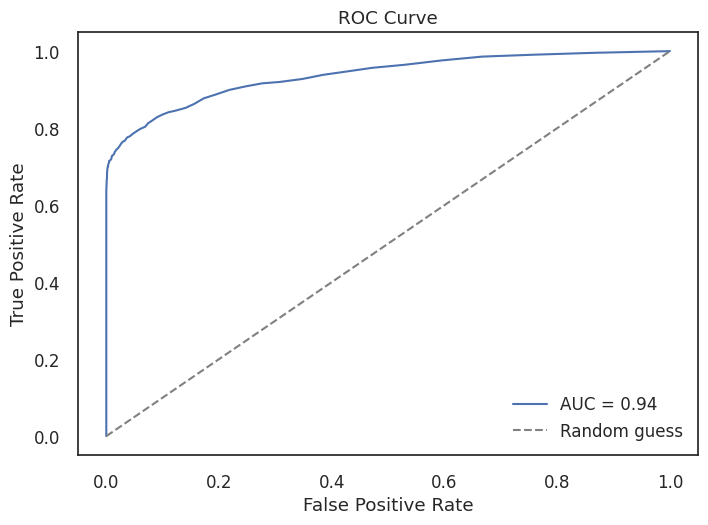

In [728]:
# Tính score dự đoán của mô hình trên tập kiểm tra
y_predict_test_rdf = random_forest_credit.predict_proba(x_credit_test)[:,1]

# Tính FPR, TPR và ngưỡng (threshold) tương ứng
fpr, tpr, threshold = roc_curve(y_credit_test,y_predict_test_rdf)

# Tính AUC-ROC
roc_auc = roc_auc_score(y_credit_test, y_predict_test_rdf)

# Vẽ đường cong AUC-ROC
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [729]:
report_rdf = classification_report(y_credit_test, y_predict_test_rdf.round())

print("Classification Report:\n", report_rdf)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.97      0.72      0.82      1411

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.94      0.93      0.93      6484



##XGBoost

In [730]:
# Tạo mô hình Random Forest với n_estimators = 100 
model_xgb = xgb.XGBClassifier(random_state = 42, n_estimators = 100)
# Fit mô hình với dữ liệu huấn luyện
model_xgb.fit(x_credit_train, y_credit_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [731]:
# Tính accuracy trên test

acc_xgb = model_xgb.score(x_credit_test, y_credit_test)
print("Accuracy score of XGBoost:", acc_xgb*100)

Accuracy score of XGBoost: 93.89265885256015


In [732]:
y_predict_train_xgb = model_xgb.predict(x_credit_train)
y_predict_test_xgb = model_xgb.predict(x_credit_test)

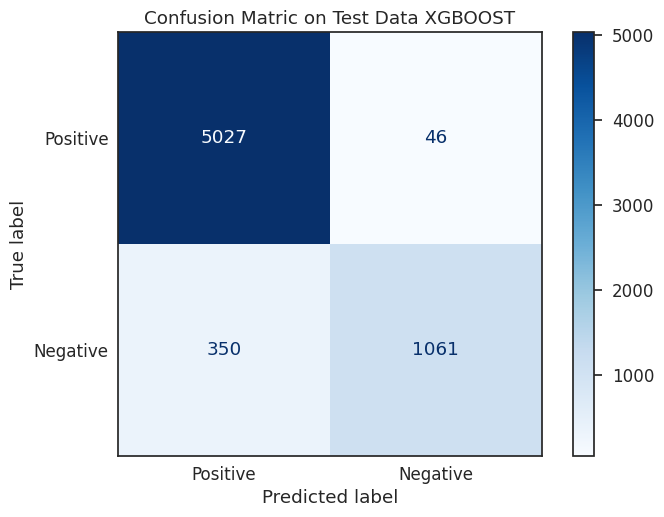

In [733]:
make_confusion_matrix(y_credit_test,y_predict_test_xgb,"Confusion Matric on Test Data XGBOOST")

Hàm nhầm lẫn trên tập test của hàm XGBoost
- Giao dịch được phê duyệt: Dự đoán đúng có 5027 giao dịch được phê duyệt (có khả năng thanh toán - không bị vỡ nợ); Dự đoán sai 46 được phê duyệt  tức là  giao dịch được phê duyệt nhưng lại dự đoán sai thành không được phê duyệt.
- Giao dịch không được phê duyệt: Dự đoán đúng có 350  giao dịch không được phê duyệt; Dự đoán sai 1061 giao dịch không được phê duyệt tức là giao dịch không được phê duyệt nhưng lại dự đoán sai thành giao dịch được phê duyệt.


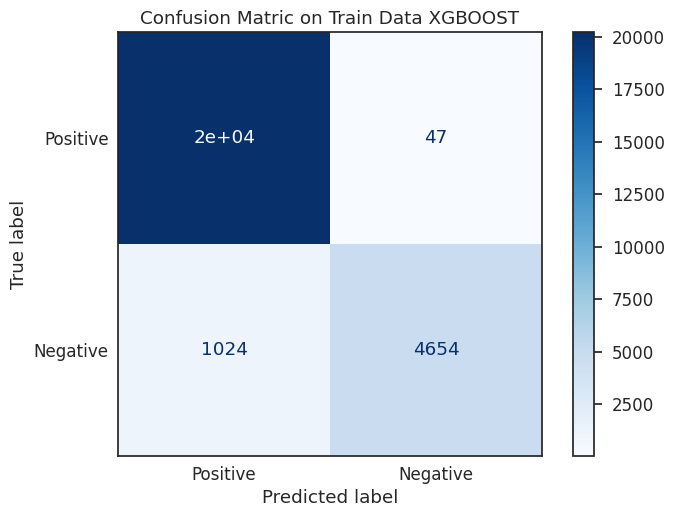

In [734]:
make_confusion_matrix(y_credit_train,y_predict_train_xgb,"Confusion Matric on Train Data XGBOOST")

Hàm nhầm lẫn trên tập train của hàm XGBoost
- Giao dịch được phê duyệt: Dự đoán đúng có 2e+4 giao dịch được phê duyệt (có khả năng thanh toán - không bị vỡ nợ); Dự đoán sai 47 được phê duyệt  tức là  giao dịch được phê duyệt nhưng lại dự đoán sai thành không phê duyệt.
- Giao dịch không được phê duyệt: Dự đoán đúng có 1024  giao dịch không được phê duyệt; Dự đoán sai 4654 giao dịch không được phê duyệt tức là giao dịch không được phê duyệt nhưng lại dự đoán sai thành giao dịch được phê duyệt.

In [735]:
report_xgb = classification_report(y_credit_test,y_predict_test_xgb.round())
print("Classification Report:\n", report_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.96      0.75      0.84      1411

    accuracy                           0.94      6484
   macro avg       0.95      0.87      0.90      6484
weighted avg       0.94      0.94      0.94      6484



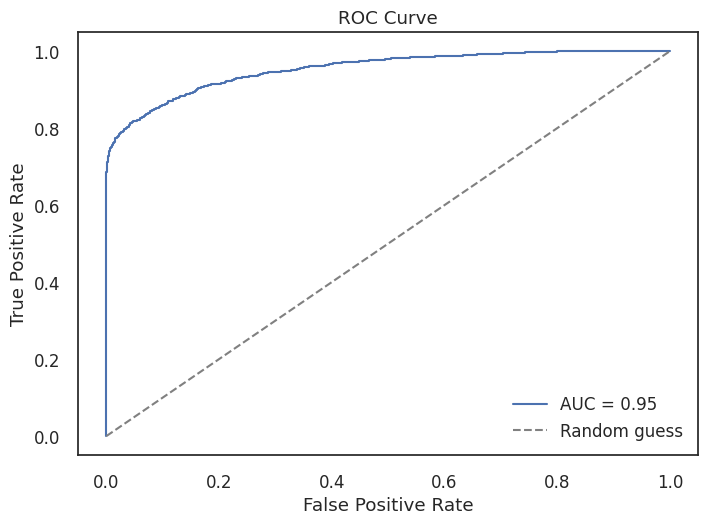

In [736]:
# Get predicted labels for test data
y_predict_test_xgb = model_xgb.predict_proba(x_credit_test)[:,1]

# Calculate FPR, TPR and corresponding thresholds
fpr, tpr, thresholds = roc_curve(y_credit_test, y_predict_test_xgb)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_credit_test, y_predict_test_xgb)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Conclusion

In [737]:
# Tính toán báo cáo đánh giá cho các mô hình
report_lgr = classification_report(y_credit_test, y_predict_test_lgr.round(), output_dict=True)
report_rdf = classification_report(y_credit_test, y_predict_test_rdf.round(), output_dict=True)
report_xgb = classification_report(y_credit_test, y_predict_test_xgb.round(), output_dict=True)

# In ra báo cáo tổng thể
print("Classification Report:\n")
print("Logistic Regression:")
print(classification_report(y_credit_test, y_predict_test_lgr.round()))
print("Random Forest:")
print(classification_report(y_credit_test, y_predict_test_rdf.round()))
print("XGBoost:")
print(classification_report(y_credit_test, y_predict_test_xgb.round()))


Classification Report:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5073
           1       0.77      0.21      0.33      1411

    accuracy                           0.81      6484
   macro avg       0.79      0.60      0.61      6484
weighted avg       0.81      0.81      0.77      6484

Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.97      0.72      0.82      1411

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.94      0.93      0.93      6484

XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.96      0.75      0.84      1411

    accuracy                           0.94      6484
   macro avg       0.95      0.87      0.90      6484
weigh

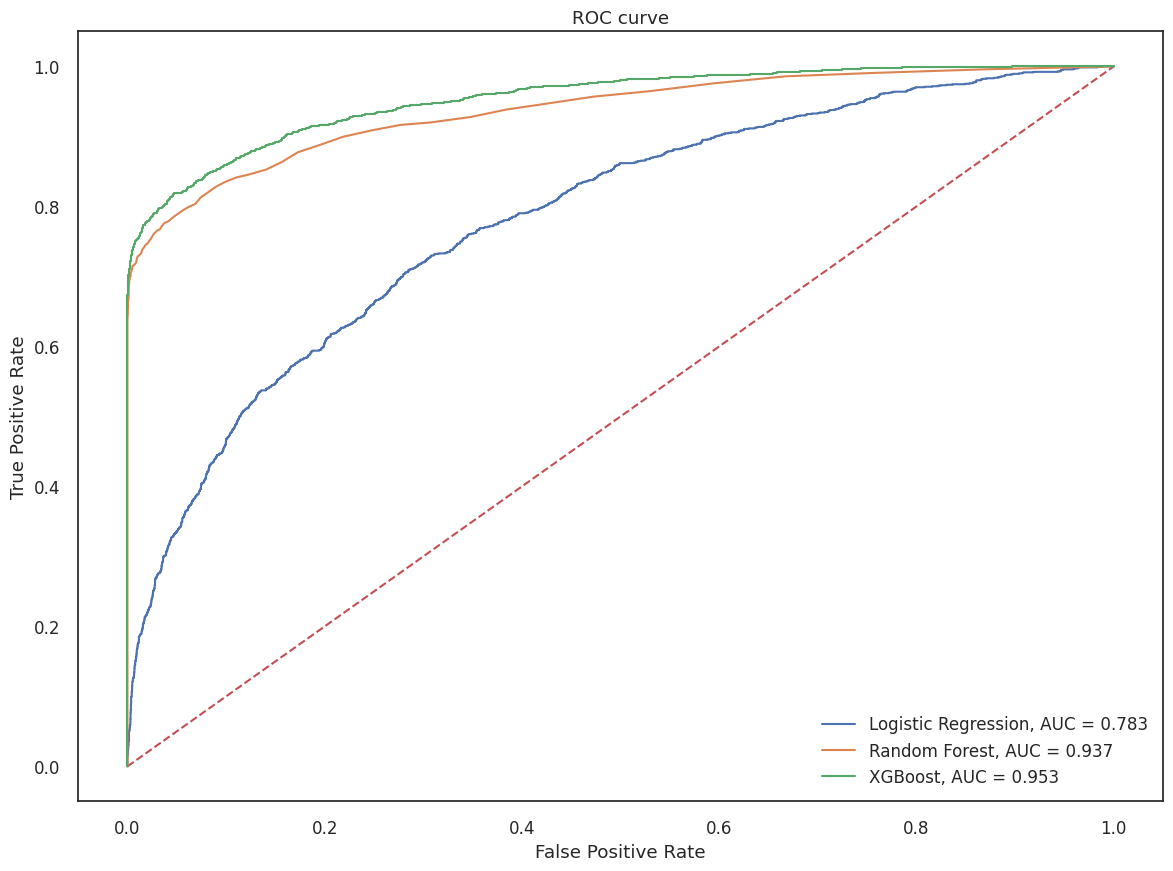

In [738]:
#ROC AUC
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')

#LGR
# Tính score dự đoán của mô hình trên tập kiểm tra
y_predict_test_lgr = logistic_credit.predict_proba(x_credit_test)[:,1]

# Tính FPR, TPR và ngưỡng (threshold) tương ứng
fpr, tpr, threshold = roc_curve(y_credit_test, y_predict_test_lgr)

# Tính AUC-ROC
roc_auc_lgr = roc_auc_score(y_credit_test, y_predict_test_lgr)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(roc_auc_lgr,3))}')

#Random Forest
y_predict_test_rdf = random_forest_credit.predict_proba(x_credit_test)[:,1]

# Tính FPR, TPR và ngưỡng (threshold) tương ứng
fpr, tpr, threshold = roc_curve(y_credit_test,y_predict_test_rdf)

# Tính AUC-ROC
roc_auc_rdf = roc_auc_score(y_credit_test, y_predict_test_rdf)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(roc_auc_rdf,3))}')

#XGBoost
# Get predicted labels for test data
y_predict_test_xgb = model_xgb.predict_proba(x_credit_test)[:,1]

# Calculate FPR, TPR and corresponding thresholds
fpr, tpr, thresholds = roc_curve(y_credit_test, y_predict_test_xgb)

# Calculate AUC-ROC
roc_auc_xgb = roc_auc_score(y_credit_test, y_predict_test_xgb)


plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(roc_auc_xgb,3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

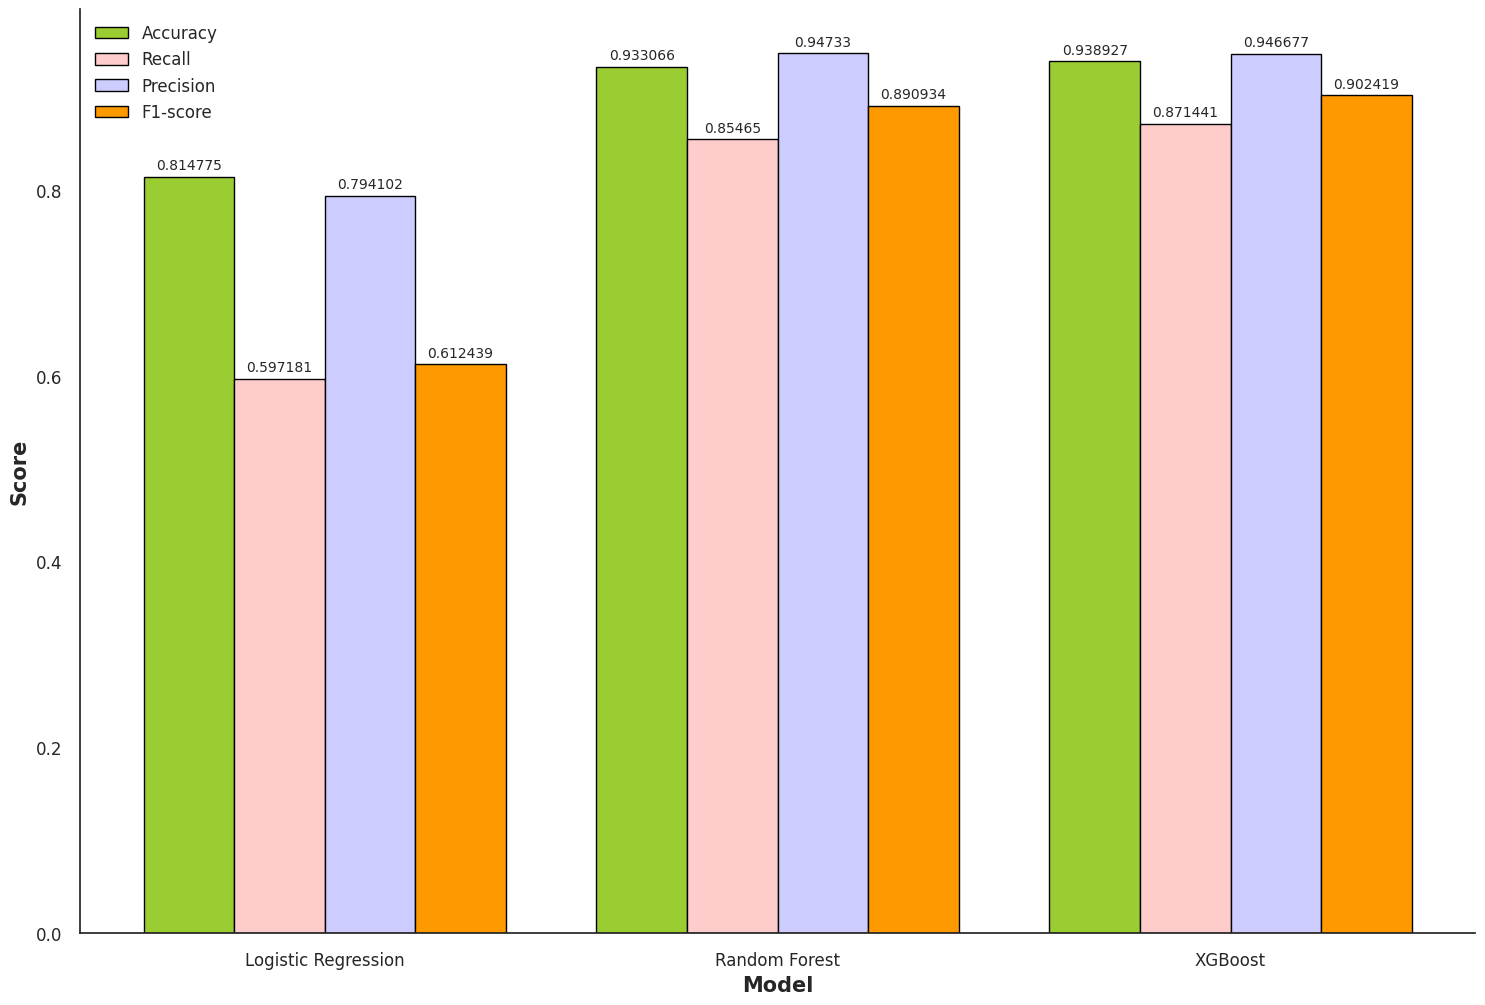

In [739]:
# Extract accuracy, recall, precision, f1-score values for each model
accuracy = [report_lgr['accuracy'], report_rdf['accuracy'], report_xgb['accuracy']]
recall = [report_lgr['macro avg']['recall'], report_rdf['macro avg']['recall'], report_xgb['macro avg']['recall']]
precision = [report_lgr['macro avg']['precision'], report_rdf['macro avg']['precision'], report_xgb['macro avg']['precision']]
f1_score = [report_lgr['macro avg']['f1-score'], report_rdf['macro avg']['f1-score'], report_xgb['macro avg']['f1-score']]

# Set the positions and width of the bars
pos = np.arange(len(accuracy))
width = 0.2

# Plot the bars
fig, ax = plt.subplots(figsize=(18,12))
ax.bar(pos, accuracy, width, color='#9ACD32', edgecolor='black', label='Accuracy')
ax.bar(pos+width, recall, width, color='#FFCCCC', edgecolor='black', label='Recall')
ax.bar(pos+2*width, precision, width, color='#CCCCFF', edgecolor='black', label='Precision')
ax.bar(pos+3*width, f1_score, width, color='#FF9900', edgecolor='black', label='F1-score')

# Add xticks on the middle of the group bars
ax.set_xlabel('Model', weight='bold', fontsize='15')
ax.set_ylabel('Score', weight='bold', fontsize='15')
ax.set_xticks([i+1.5*width for i in range(len(accuracy))])
ax.set_xticklabels(['Logistic Regression', 'Random Forest', 'XGBoost'], fontsize=12)

# Add legend and show the plot
ax.legend(fontsize=12)
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=3)
sns.despine()
plt.show()


Text(0.5, 0, 'Gain')

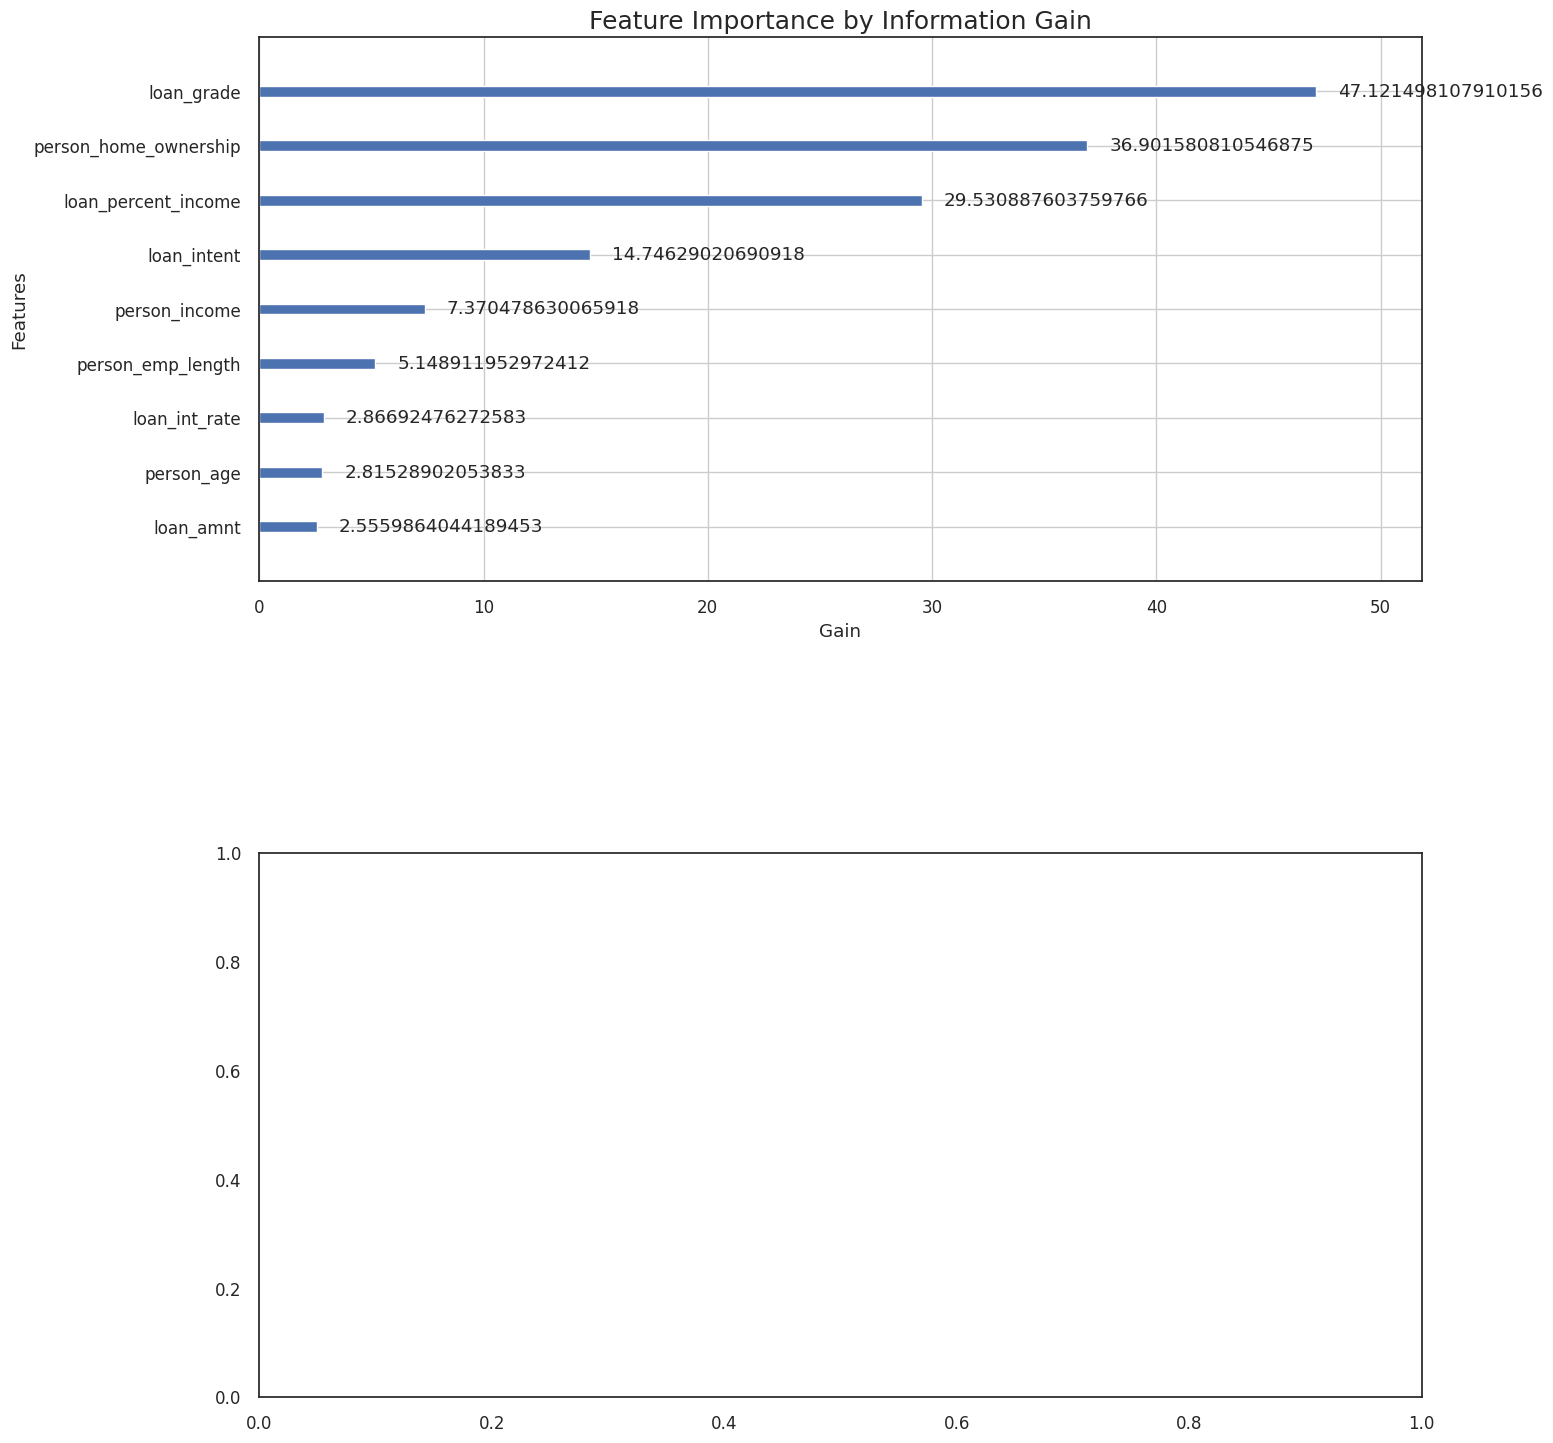

In [740]:
#Feature importance plot
fig, (ax1, ax2) = plt.subplots(figsize = (15, 17), ncols=1, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.5)
plot_importance(model_xgb, importance_type='gain', ax = ax1)
ax1.set_title('Feature Importance by Information Gain', fontsize = 18)
ax1.set_xlabel('Gain')